In [1]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [2]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import datetime
sys.path.append('..')
import covid19_inference as cov19
import pandas as pd

In [3]:
rki = cov19.data_retrieval.RKI(True)
jhu = cov19.data_retrieval.JHU(True)

INFO     [covid19_inference.data_retrieval] Using local rki data because no newer version available online.


In [5]:
#Lists Sundays
begin = rki.data.date.min()
end = rki.data.date.max()
date_range = pd.date_range(begin, end)
sundays = date_range[date_range.weekday == 6]
saturdays = date_range[date_range.weekday == 5]

## JHU vs RKI

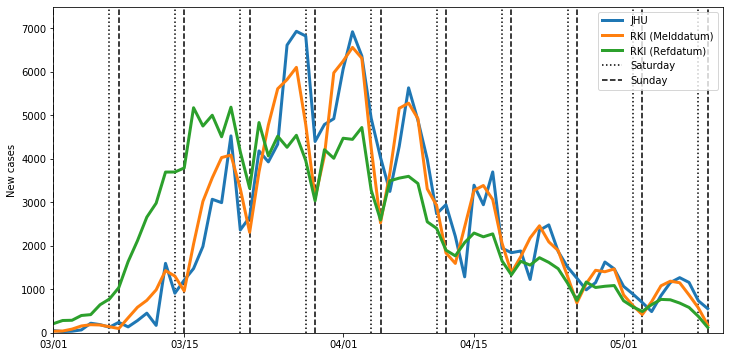

In [7]:
data_rki_meld = rki.get_confirmed()
data_rki_meld_new = data_rki_meld.diff().drop(data_rki_meld.index[0]).astype(int).reset_index()
#data_rki_meld_new['date'] = data_rki_meld_new['date'].apply(lambda x: datetime.datetime.fromisoformat(x))

data_rki_ref = rki.get_confirmed(date_type='date_ref')
data_rki_ref_new = data_rki_ref.diff().drop(data_rki_ref.index[0]).astype(int).reset_index()
#data_rki_ref_new['date'] = data_rki_ref_new['date_ref'].apply(lambda x: datetime.datetime.fromisoformat(x))

data_jhu = jhu.get_confirmed('Germany')
data_jhu_new = data_jhu.diff().drop(data_jhu.index[0]).astype(int).reset_index()

plt.figure(figsize=(12,6))
plt.plot(data_jhu_new.date, data_jhu_new.confirmed, label='JHU', lw=3)
plt.plot(data_rki_meld_new.date, data_rki_meld_new.AnzahlFall, label='RKI (Melddatum)',lw=3)
plt.plot(data_rki_ref_new.date_ref, data_rki_ref_new.AnzahlFall, label='RKI (Refdatum)',lw=3)
plt.vlines(saturdays, ymin=0, ymax=7500, linestyles='dotted', label='Saturday')
plt.vlines(sundays, ymin=0, ymax=7500, linestyles='dashed', label='Sunday')

plt.xlim([datetime.datetime(2020,3,1), datetime.datetime.today()])
plt.ylim([0,7500])
plt.ylabel('New cases')
plt.legend()
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))

## New cases per Bundesland

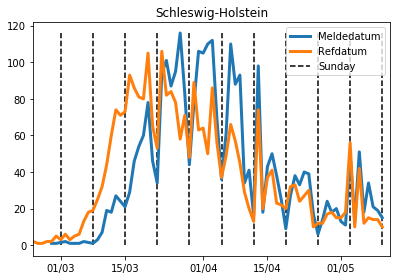

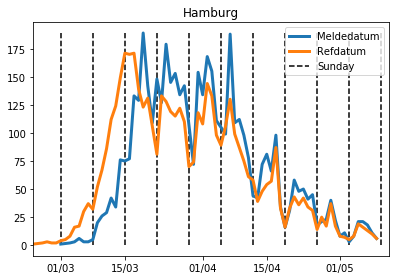

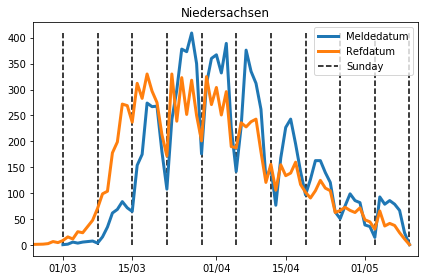

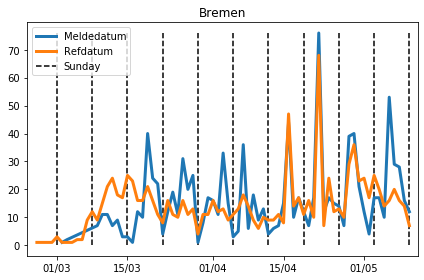

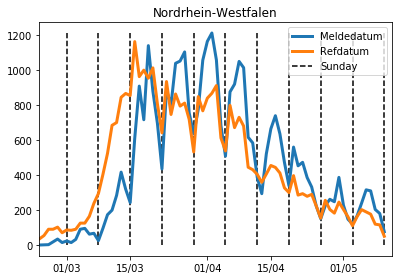

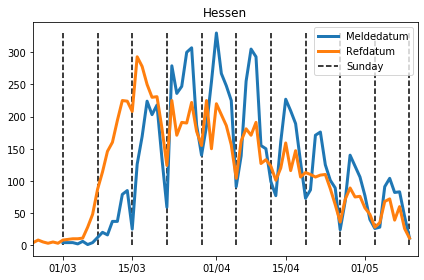

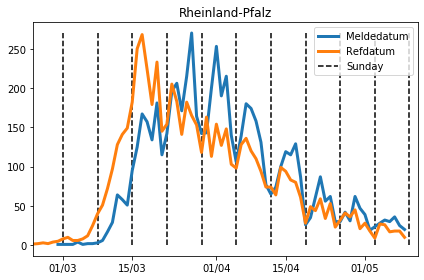

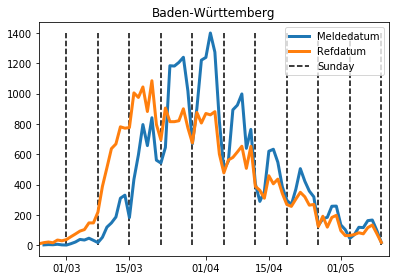

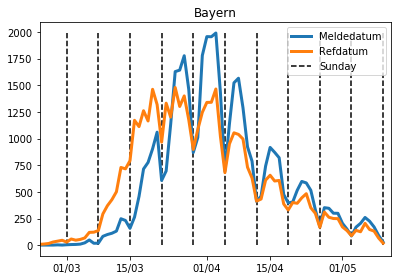

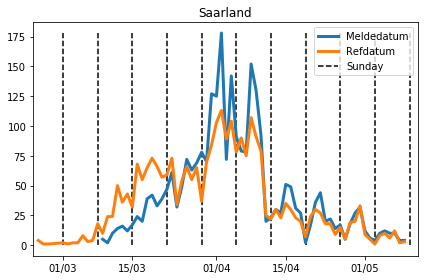

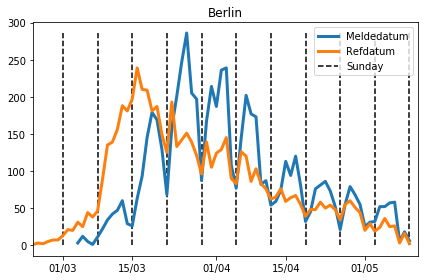

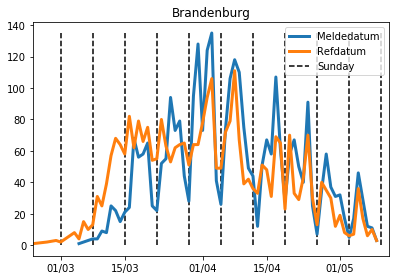

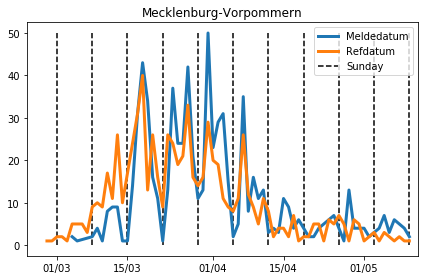

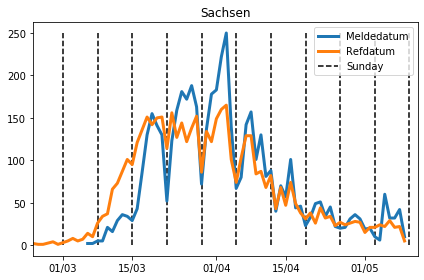

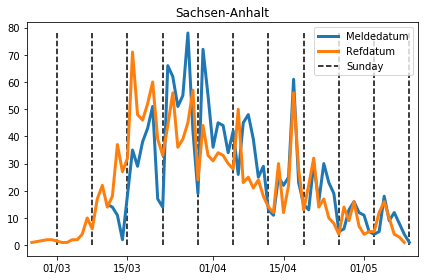

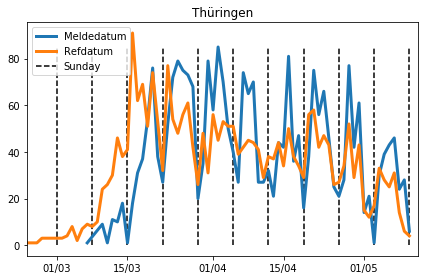

In [18]:
#Plots Bundesland (Meldedatum)
x_range = [datetime.datetime(2020,2,24), datetime.datetime.today()]

bundesland_list = rki.data.Bundesland.unique()
for str_bundesland in bundesland_list:
    data = rki.get_confirmed(bundesland=str_bundesland)
    data_new = data.diff().drop(data.index[0]).astype(int).reset_index()
    
    data_ref = rki.get_confirmed(bundesland=str_bundesland, date_type='date_ref')
    data_ref_new = data_ref.diff().drop(data_ref.index[0]).astype(int).reset_index()
    #data_new['date'] = data_new['date'].apply(lambda x: datetime.datetime.fromisoformat(x))
    
    plt.figure(figsize=(6,4))
    plt.vlines(sundays, ymin=0, ymax=data_new.AnzahlFall.max(), linestyles='dashed', label='Sunday')
    plt.plot(data_new.date, data_new.AnzahlFall, label='Meldedatum', lw=3)
    plt.plot(data_ref_new.date_ref, data_ref_new.AnzahlFall, label='Refdatum', lw=3)
    plt.title(str_bundesland)
    plt.tight_layout()
    #plt.gca().tick_params(labelbottom=False)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d/%m'))
    plt.xlim(x_range)
    plt.legend()